In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [35]:
dataset = pd.read_csv(r"C:\Users\Satyajeet\Desktop\Telco Customer churn\archive (20)\telco.csv")
dataset

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [36]:
dataset.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [37]:
dataset.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Under 30                              object
Senior Citizen                        object
Married                               object
Dependents                            object
Number of Dependents                   int64
Country                               object
State                                 object
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Population                             int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple L

In [38]:
dataset.drop(['Customer ID','Country','State','City','Zip Code','Latitude','Longitude','Population','Quarter','Total Charges', 'Total Refunds',
                'Total Extra Data Charges','Total Long Distance Charges', 'Total Revenue', 'CLTV','Churn Label', 'Churn Score', 'Churn Category', 'Churn Reason']
                , axis=1,inplace=True)

# Important Note

1. High cardinality / too many categories

Columns like City, State, Zip Code can have hundreds or thousands of unique values.

Encoding them (e.g., one-hot encoding) would create a huge sparse feature space with very little predictive power.

Example: Knowing a customer is from "Pune" vs "Mumbai" usually doesn’t strongly determine churn on its own.

2. Indirect or weak relationship with churn

Churn is usually driven more by services, billing, satisfaction, and tenure than by location.

Unless the dataset is specifically about regional churn behavior (e.g., certain areas have poor service coverage), geography tends to be weak.

3. Risk of noise & overfitting

Models might latch onto random regional quirks rather than true churn drivers.

Example: If in your dataset, a handful of customers from "Delhi" churned, the model may wrongly think "Delhi = churn risk," even though it’s just coincidence.

4. Redundancy with other features

Things like Population, Zip Code, Latitude, Longitude are often correlated with each other.

They may just add noise without giving new information.

When could location be useful?

If churn is affected by network coverage, regional pricing, service availability, or regulation.

In that case, you could use region (binned) instead of exact City/Zip. For example:

Urban vs Rural

Region (North, South, East, West)

Country (if it’s multi-country data)


* “These columns are either summaries of existing features (like Total Charges or Total Revenue), or they contain future knowledge that wouldn’t be available when making a churn prediction (like Refunds or CLTV). If we include them, the model will ‘cheat’ and learn from information it shouldn’t have. Instead, we stick to monthly-level features, services, satisfaction, and tenure, because those are the things we actually know about the customer at the time we want to predict churn.”

* “These columns already describe churn outcomes. They are like looking into the future — you can only know them once a customer has churned. If we include them, our model will ‘cheat’ and just memorize churn instead of learning from customer behavior. That’s why we drop them and keep only features that are available before churn happens.”

In [39]:
dataset.head(10)

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Satisfaction Score,Customer Status
0,Male,78,No,Yes,No,No,0,No,0,1,...,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,3,Churned
1,Female,74,No,Yes,Yes,Yes,1,Yes,1,8,...,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,3,Churned
2,Male,71,No,Yes,No,Yes,3,No,0,18,...,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,2,Churned
3,Female,78,No,Yes,Yes,Yes,1,Yes,1,25,...,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2,Churned
4,Female,80,No,Yes,Yes,Yes,1,Yes,1,37,...,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2,Churned
5,Female,72,No,Yes,No,Yes,1,No,0,27,...,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,78.05,1,Churned
6,Female,76,No,Yes,Yes,Yes,2,Yes,1,1,...,No,No,No,Yes,Month-to-Month,Yes,Mailed Check,70.45,2,Churned
7,Male,66,No,Yes,Yes,No,0,Yes,6,58,...,No,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,45.30,1,Churned
8,Female,70,No,Yes,No,Yes,2,No,0,15,...,No,No,No,Yes,Month-to-Month,Yes,Mailed Check,74.45,2,Churned
9,Female,77,No,Yes,No,Yes,2,No,0,7,...,No,No,No,No,Month-to-Month,No,Bank Withdrawal,76.45,2,Churned


In [40]:
dataset["Offer"].fillna(dataset["Offer"].mode()[0], inplace=True)
#“The Offer column represents the type of promotional bundle a customer signed up with.

#Offers A–C are shorter-term discounts (higher churn risk after expiry), while Offers D and E are longer-term loyalty packages (customers are more likely to stay).

#This makes Offer an important predictor because it directly affects how ‘sticky’ a customer is.” 

C:\Users\Satyajeet\AppData\Local\Temp\ipykernel_14128\549892380.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Offer"].fillna(dataset["Offer"].mode()[0], inplace=True)


In [41]:
dataset["Internet Type"].fillna(dataset["Internet Type"].mode()[0],inplace=True)

C:\Users\Satyajeet\AppData\Local\Temp\ipykernel_14128\1902411669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Internet Type"].fillna(dataset["Internet Type"].mode()[0],inplace=True)


In [42]:
dataset.isnull().sum()

Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Number of Dependents                 0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                 

In [43]:
dataset.dtypes # Gender, Under 30, Senior Citizen, Married, Dependents,
#Referred a Friend,  Offer, Phone Service,
# Multiple Lines, Internet Service, Internet Type,
#, Online Security, Online Backup, Device Protection Plan,
#Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music,
#Unlimited Data, Contract, Paperless Billing, Payment Method,


Gender                                object
Age                                    int64
Under 30                              object
Senior Citizen                        object
Married                               object
Dependents                            object
Number of Dependents                   int64
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming 

In [44]:
binary_cols = [
    "Gender", "Under 30", "Senior Citizen", "Married", "Dependents",
    "Referred a Friend", "Phone Service", "Multiple Lines","Internet Service" ,"Online Security",
    "Online Backup", "Device Protection Plan", "Premium Tech Support",
    "Streaming TV", "Streaming Movies", "Streaming Music",
    "Unlimited Data", "Paperless Billing"
]

for col in binary_cols:
    dataset[col] = dataset[col].map({"Yes":1, "No":0, "Male":1, "Female":0})


In [45]:
Offer_mapping={
    "Offer A":1 ,
    "Offer B":2 ,
    "Offer C":3 ,
    "Offer D":4 ,
    "Offer E":5
}

dataset["Offer"]=dataset["Offer"].map(Offer_mapping)

In [46]:
Internet_type_mapping = {
    'DSL':1, 
    'Fiber Optic':2,
    'Cable':3
}

dataset["Internet Type"]=dataset["Internet Type"].map(Internet_type_mapping)

In [47]:
Contract_mapping={'Month-to-Month':1, 'One Year':2, 'Two Year':3}

dataset['Contract']=dataset["Contract"].map(Contract_mapping)

In [48]:
Payment={'Bank Withdrawal':1, 'Credit Card':2, 'Mailed Check':3}

dataset["Payment Method"]=dataset["Payment Method"].map(Payment)

In [49]:
dataset.head(10)

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Satisfaction Score,Customer Status
0,1,78,0,1,0,0,0,0,0,1,...,0,1,0,0,1,1,1,39.65,3,Churned
1,0,74,0,1,1,1,1,1,1,8,...,0,0,0,1,1,1,2,80.65,3,Churned
2,1,71,0,1,0,1,3,0,0,18,...,1,1,1,1,1,1,1,95.45,2,Churned
3,0,78,0,1,1,1,1,1,1,25,...,1,1,0,1,1,1,1,98.50,2,Churned
4,0,80,0,1,1,1,1,1,1,37,...,0,0,0,1,1,1,1,76.50,2,Churned
5,0,72,0,1,0,1,1,0,0,27,...,0,0,0,0,1,1,1,78.05,1,Churned
6,0,76,0,1,1,1,2,1,1,1,...,0,0,0,1,1,1,3,70.45,2,Churned
7,1,66,0,1,1,0,0,1,6,58,...,0,1,0,1,1,1,1,45.30,1,Churned
8,0,70,0,1,0,1,2,0,0,15,...,0,0,0,1,1,1,3,74.45,2,Churned
9,0,77,0,1,0,1,2,0,0,7,...,0,0,0,0,1,0,1,76.45,2,Churned


In [54]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split features & target
X = dataset.drop("Customer Status", axis=1)
y = dataset["Customer Status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize CatBoost model
model = CatBoostClassifier(
    iterations=500,          # number of trees
    depth=6,                 # tree depth
    learning_rate=0.1,       # step size
    eval_metric="AUC",       # evaluation metric
    random_seed=42,
    verbose=100,
    class_weights=[1, 3,1]     # handle imbalance (increase weight for churn class)
)

# Fit model
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Evaluation
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba,multi_class="ovr"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
import pandas as pd
feat_importances = pd.Series(model.get_feature_importance(), index=X.columns)
print("\nTop Features:\n", feat_importances.sort_values(ascending=False).head(10))


0:	test: 0.9781337	best: 0.9781337 (0)	total: 14.3ms	remaining: 7.13s
100:	test: 0.9976134	best: 0.9976839 (86)	total: 1.73s	remaining: 6.82s
200:	test: 0.9975834	best: 0.9976839 (86)	total: 2.9s	remaining: 4.32s
300:	test: 0.9975067	best: 0.9976839 (86)	total: 4.07s	remaining: 2.69s
400:	test: 0.9973587	best: 0.9976839 (86)	total: 5.16s	remaining: 1.27s
499:	test: 0.9973433	best: 0.9976839 (86)	total: 6.41s	remaining: 0us

bestTest = 0.9976839275
bestIteration = 86

Shrink model to first 87 iterations.
ROC-AUC Score: 0.9965112081817349

Classification Report:
               precision    recall  f1-score   support

     Churned       0.97      0.89      0.93       374
      Joined       0.87      0.99      0.92        91
      Stayed       0.97      0.99      0.98       944

    accuracy                           0.96      1409
   macro avg       0.94      0.96      0.95      1409
weighted avg       0.97      0.96      0.96      1409


Confusion Matrix:
 [[334  14  26]
 [  1  90   0]
 

### “Our CatBoost model achieves 96% accuracy and ~0.997 ROC-AUC. It identifies churners with high precision and very good recall. The most important drivers are contract type, tenure, billing, and internet-related services. Payment method and number of dependents have much less influence.”

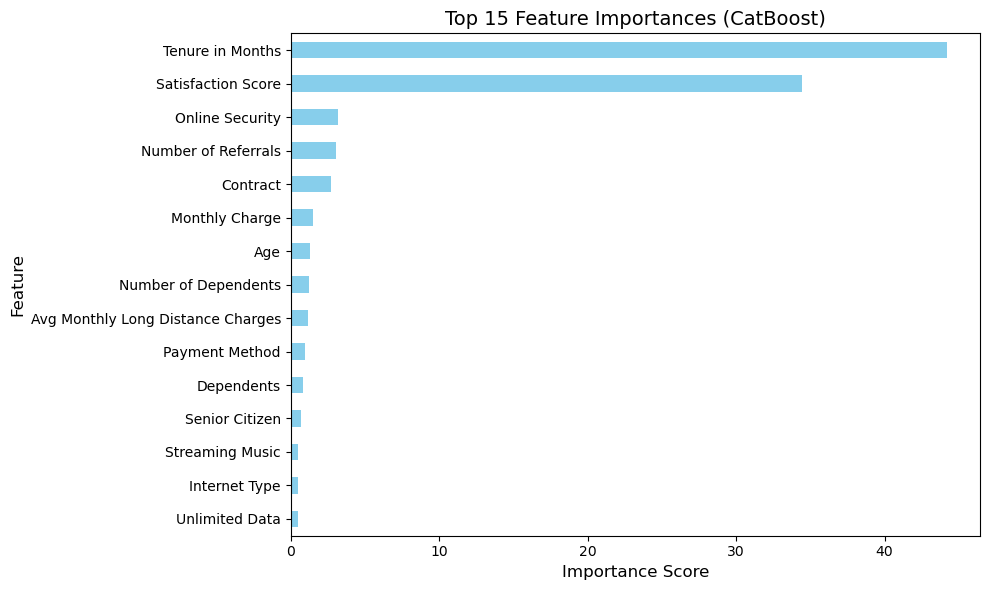

In [56]:
import pandas as pd

# Get feature importance directly from CatBoost
feature_importances = pd.Series(
    model.get_feature_importance(),
    index=X_train.columns
)

# Select top 15 and plot
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_features[::-1].plot(kind='barh', color='skyblue')
plt.title("Top 15 Feature Importances (CatBoost)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


In [78]:
# Example new customer data (replace values with real ones)
new_customer = {
    "Gender": 1,
    "Age":30,# after encoding (e.g. Male=1, Female=0)
    "Under 30": 1,
    "Senior Citizen": 0,
    "Married": 1,
    "Dependents": 0,
    "Number of Dependents":2,
    "Referred a Friend": 1,
    "Number of Referrals":2,
    "Tenure in Months": 12,
    "Offer": 5,                           # depends on your encoding of A–E
    "Phone Service": 1,
    "Avg Monthly Long Distance Charges": 15.5,
    "Multiple Lines": 1,
    "Internet Service": 1,
    "Internet Type": 3,
    "Avg Monthly GB Download":4,
    "Online Security": 1,
    "Online Backup": 1,
    "Device Protection Plan": 1,
    "Premium Tech Support": 1,
    "Streaming TV": 1,
    "Streaming Movies": 1,
    "Streaming Music": 1,
    "Unlimited Data": 1,
    "Contract": 2,
    "Paperless Billing": 1,
    "Payment Method": 3,
    "Monthly Charge": 70.3,
    "Satisfaction Score":4
    
    # ... include all other numeric columns you used for training
}

import pandas as pd

# Convert dict → DataFrame
new_customer_df = pd.DataFrame([new_customer])


In [79]:
# Predict class
prediction = model.predict(new_customer_df)

# Predict probabilities
prediction_proba = model.predict_proba(new_customer_df)

print("Predicted Class:", prediction[0])
print("Class Probabilities:", prediction_proba[0])


Predicted Class: ['Stayed']
Class Probabilities: [0.00623645 0.004225   0.98953855]


In [80]:
import joblib

# Save model
joblib.dump(model, "churn_model.pkl")

# Save encoders/scalers if used
joblib.dump(X_train.columns, "model_columns.pkl")  # important for feature order


['model_columns.pkl']